# Data Preprocessing

In [553]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import normalize
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import csv
import seaborn as sn
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

In [4]:
#import data
df = pd.read_excel("Admission_hopital.xlsx", index_col= 0)

In [174]:
#Eliminate columns with only zeros and only nan

df_new = df.loc[:, (df != 0).any(axis=0)]
df_new = df_new.loc[:, (df_new.isnull() != True).any(axis=0)]
df_columns = list(df_new.columns)

In [175]:
df_new.shape

(2499, 895)

Ici nous allons importer la liste des variables categoriques et la liste des variables numeriques

In [223]:
with open('Categorical_columns.csv') as f:
    reader = csv.reader(f)
    data = list(reader)

data_categ = []
for i in data:
    data_categ.append(i[0])

with open('Numeric_columns.csv') as f:
    reader = csv.reader(f)
    data = list(reader)

data_num = []
for i in data:
    data_num.append(i[0])
    
with open('Binary_columns.csv') as f:
    reader = csv.reader(f)
    data = list(reader)

data_bin = []
for i in data:
    data_bin.append(i[0])

In [280]:
numeric = []
categs = []
binary = []
for i in df_columns:
    if i in data_categ:
        categs.append(i)
    if i in data_num:
        numeric.append(i)
    if i in data_bin:
        binary.append(i)

In [294]:
#Split into categorical and numerical data

df_categ = df_new.loc[:, categs]
df_categ_esi = pd.get_dummies(df_categ["esi"])
df_categ_esi.columns=['esi_1', 'esi_2', 'esi_3', 'esi_4', 'esi_5']
df_categ = df_categ.drop("esi", axis = 1)
df_categ = pd.concat((df_categ, df_categ_esi), axis = 1)
df_categ = pd.get_dummies(df_categ)


df_num = df_new.loc[:, numeric]

df_bin = df_new.loc[:, binary]
df_bin = df_bin.drop("disposition", axis = 1)
df_bin = df_bin.fillna(0)



In [295]:
for i in range(df_bin.shape[1]):
    if df_bin.dtypes[i] == 'O':
        labels_cat = list(df_bin.iloc[:, i].unique())
        mapping_cat = dict(zip(labels_cat,range(len(labels_cat))))
        df_bin.iloc[:, i] = df_bin.iloc[:, i].map(mapping_cat)

In [296]:
#Transform categorical data into integer classes and take away the y

y = df_new.disposition
labels = list(y.unique())
mapping = dict(zip(labels,range(len(labels))))
y = y.map(mapping)

In [297]:
#fill the na values for the numerical data with different values

df_num_zero = df_num.fillna(0)
df_num_min = df_num.fillna(df_num.min())
df_num_max = df_num.fillna(df_num.max())
df_num_mean = df_num.fillna(df_num.mean())

In [298]:
df_bin.shape

(2499, 440)

In [333]:
df_num.shape

(2499, 392)

In [300]:
df_categ_dummies = pd.concat((df_bin,df_categ), axis = 1)

In [308]:
df_categ.isnull().sum().max()

0

In [332]:
df_categ_dummies.shape

(2499, 534)

In [289]:
y = df_new.disposition
y = y.map(mapping)
y

1       0
2       0
3       0
4       0
5       1
       ..
2495    1
2496    1
2497    0
2498    1
2499    0
Name: disposition, Length: 2499, dtype: int64

# Algorithms

### Numerical variables

Classifiers:  LogisticRegression Has a training precision of 60.0 %  and a test precision of 73.0 %
Classifiers:  LogisticRegression Has a recall of 18.0 %  and a test recall of 20.0 %
train confusion matrix
test confusion matrix


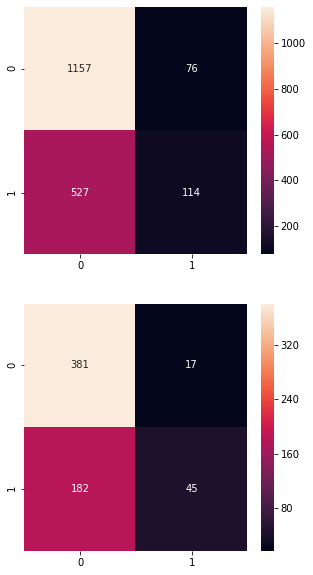

In [473]:
#Using all numerical data

X = df_num_max
X = normalize(X)
y = df_new.disposition
y = y.map(mapping)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24)

regr = LogisticRegression()
regr.fit(X_train, y_train)

# model output for the input data
yp = cross_val_predict(regr, X_train, y_train, cv = 10)
precision = precision_score(y_train, yp)
recall = recall_score(y_train, yp)
yptest = regr.predict(X_test)
precisiontest = precision_score(y_test, yptest)
recalltest = recall_score(y_test, yptest)
confmat_train = confusion_matrix(y_train, yp)
confmat_test = confusion_matrix(y_test,yptest)

print("Classifiers: ", regr.__class__.__name__, "Has a training precision of", round(precision, 2) * 100, "% ",
     "and a test precision of", round(precisiontest, 2) * 100, "%")
print("Classifiers: ", regr.__class__.__name__, "Has a recall of", round(recall, 2) * 100, "% ",
     "and a test recall of", round(recalltest, 2) * 100, "%")

fig, axs = plt.subplots(2, figsize = (5,10))

print("train confusion matrix")
sn.heatmap(confmat_train, annot=True, fmt="d", ax = axs[0])
print("test confusion matrix")
sn.heatmap(confmat_test, annot=True, fmt="d", ax = axs[1])

In [478]:
X = df_num_zero
X = normalize(X)
y = df_new.disposition
y = y.map(mapping)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24)

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier()
}

for key, classifier in classifiers.items():

    training_precision = cross_val_score(classifier, X_train, y_train, cv = 10)
    training_recall = cross_val_score(classifier, X_train, y_train, cv = 10, scoring = 'recall')
    classifier.fit(X_train, y_train)
    yptest = classifier.predict(X_test)
    precisiontest = precision_score(y_test, yptest)
    recalltest = recall_score(y_test, yptest)
    f1 = f1_score(y_test, yptest)
    
    print("Classifiers: ", classifier.__class__.__name__, "Has a training precision of", round(training_precision.mean(), 2) * 100, "% accuracy score",
         "and a test precision of", round(precisiontest, 2) * 100, "%")
    print("Classifiers: ", classifier.__class__.__name__, "Has a training recall of", round(training_recall.mean(), 2) * 100, "% accuracy score",
         "and a test recall of", round(recalltest, 2) * 100, "%")
    print("Classifiers: ", classifier.__class__.__name__,
         "Has a test f1 score of", round(f1, 2) * 100, "%")


Classifiers:  LogisticRegression Has a training precision of 71.0 % accuracy score and a test precision of 78.0 %
Classifiers:  LogisticRegression Has a training recall of 35.0 % accuracy score and a test recall of 37.0 %
Classifiers:  LogisticRegression Has a test f1 score of 50.0 %
Classifiers:  KNeighborsClassifier Has a training precision of 70.0 % accuracy score and a test precision of 56.99999999999999 %
Classifiers:  KNeighborsClassifier Has a training recall of 38.0 % accuracy score and a test recall of 37.0 %
Classifiers:  KNeighborsClassifier Has a test f1 score of 45.0 %
Classifiers:  DecisionTreeClassifier Has a training precision of 74.0 % accuracy score and a test precision of 65.0 %
Classifiers:  DecisionTreeClassifier Has a training recall of 63.0 % accuracy score and a test recall of 61.0 %
Classifiers:  DecisionTreeClassifier Has a test f1 score of 63.0 %
Classifiers:  RandomForestClassifier Has a training precision of 81.0 % accuracy score and a test precision of 80.

In [30]:
X = df_num_zero
X = normalize(X)
y = df_new.disposition
y = y.map(mapping)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24)
fs = SelectKBest(score_func = f_classif, k = "all")
fs.fit(X_train, y_train)

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 49 122 195 268 359] are constant.
  UserWarning)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k='all', score_func=<function f_classif at 0x000001D5C19A7DC8>)

In [555]:
pd.set_option('display.max_rows', 100)
columns = list(df_num_zero.columns)
pd.DataFrame(fs.pvalues_, index=columns).sort_values(by=0).dropna().head(130)

,0
meds_cardiovascular,6.010100e-45
triage_vital_dbp,7.311119e-35
meds_diuretics,9.537164e-32
triage_vital_temp,1.395264e-31
triage_vital_sbp,1.522624e-30
...,...
chloride_last,1.345637e-09
mch_last,1.429929e-09
pocbun_min,1.477846e-09
monocytes_median,1.486140e-09


In [557]:
#Feature selection using Anova-f selection using various k
warnings.simplefilter('ignore')
precisions_classif_RF = {}
recall_classif_RF = {}
f1_classif_RF = {}
ks1 = range(1,30)

for i in ks1:
    X = df_num_zero
    X = normalize(X)
    y = df_new.disposition
    y = y.map(mapping)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24)

    fs = SelectKBest(score_func = f_classif, k = i)
    fs.fit(X_train, y_train)
    X_train = fs.transform(X_train)
    X_test = fs.transform(X_test)

    regr = RandomForestClassifier()
    regr.fit(X_train, y_train)

    # model output for the input data
    yp = cross_val_predict(regr, X_train, y_train, cv = 10)
    precision = precision_score(y_train, yp)
    recall = recall_score(y_train, yp)
    f1 = f1_score(y_train, yp)
    
    precisions_classif_RF[i] = round(precision,2)
    recall_classif_RF[i] = round(recall,2)
    f1_classif_RF[i] = round(f1,2)
    

In [557]:
#Feature selection using Anova-f selection using various k
warnings.simplefilter('ignore')
precisions_classif_RF = {}
recall_classif_RF = {}
f1_classif = {}
ks = range(1,100)

for i in ks:
    X = df_num_zero
    X = normalize(X)
    y = df_new.disposition
    y = y.map(mapping)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24)

    fs = SelectKBest(score_func = f_classif, k = i)
    fs.fit(X_train, y_train)
    X_train = fs.transform(X_train)
    X_test = fs.transform(X_test)

    regr = RandomForestClassifier()
    regr.fit(X_train, y_train)

    # model output for the input data
    yp = cross_val_predict(regr, X_train, y_train, cv = 10)
    precision = precision_score(y_train, yp)
    recall = recall_score(y_train, yp)
    f1 = f1_score(y_train, yp)
    
    precisions_classif_RF[i] = round(precision,2)
    recall_classif_RF[i] = round(recall,2)
    f1_classif[i] = round(f1,2)
    

In [558]:
#Feature selection using Anova-f selection using various k
warnings.simplefilter('ignore')
precisions_classif = {}
recall_classif = {}
f1_classif_log = {}
ks = range(1,100)

for i in ks:
    X = df_num_zero
    X = normalize(X)
    y = df_new.disposition
    y = y.map(mapping)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24)

    fs = SelectKBest(score_func = f_classif, k = i)
    fs.fit(X_train, y_train)
    X_train = fs.transform(X_train)
    X_test = fs.transform(X_test)

    regr = LogisticRegression()
    regr.fit(X_train, y_train)

    # model output for the input data
    yp = cross_val_predict(regr, X_train, y_train, cv = 10)
    precision = precision_score(y_train, yp)
    recall = recall_score(y_train, yp)
    f1 = f1_score(y_train, yp)
    
    precisions_classif[i] = round(precision,2)
    recall_classif[i] = round(recall,2)
    f1_classif_log[i] = round(f1,2)
    

In [559]:
#Feature selection using Anova-f selection using various k
warnings.simplefilter('ignore')
precisions_classif = {}
recall_classif = {}
f1_classif_KNN = {}
ks = range(1,100)

for i in ks:
    X = df_num_zero
    X = normalize(X)
    y = df_new.disposition
    y = y.map(mapping)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24)

    fs = SelectKBest(score_func = f_classif, k = i)
    fs.fit(X_train, y_train)
    X_train = fs.transform(X_train)
    X_test = fs.transform(X_test)

    regr = KNeighborsClassifier()
    regr.fit(X_train, y_train)

    # model output for the input data
    yp = cross_val_predict(regr, X_train, y_train, cv = 10)
    precision = precision_score(y_train, yp)
    recall = recall_score(y_train, yp)
    f1 = f1_score(y_train, yp)
    
    precisions_classif[i] = round(precision,2)
    recall_classif[i] = round(recall,2)
    f1_classif_KNN[i] = round(f1,2)
    

In [560]:
#Feature selection using Anova-f selection using various k
warnings.simplefilter('ignore')
precisions_classif = {}
recall_classif = {}
f1_classif_DecisionTree = {}
ks = range(1,100)

for i in ks:
    X = df_num_zero
    X = normalize(X)
    y = df_new.disposition
    y = y.map(mapping)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24)

    fs = SelectKBest(score_func = f_classif, k = i)
    fs.fit(X_train, y_train)
    X_train = fs.transform(X_train)
    X_test = fs.transform(X_test)

    regr = DecisionTreeClassifier()
    regr.fit(X_train, y_train)

    # model output for the input data
    yp = cross_val_predict(regr, X_train, y_train, cv = 10)
    precision = precision_score(y_train, yp)
    recall = recall_score(y_train, yp)
    f1 = f1_score(y_train, yp)
    
    precisions_classif[i] = round(precision,2)
    recall_classif[i] = round(recall,2)
    f1_classif_DecisionTree[i] = round(f1,2)
    

<function matplotlib.pyplot.show(*args, **kw)>

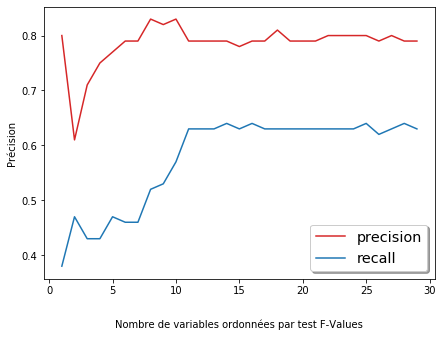

In [572]:
warnings.simplefilter('ignore')
fig, ax1 = plt.subplots(figsize = (7,5))

plt.xlabel("Nombre de variables ordonnées par test F-Values", )

color = 'tab:red'
ax1.plot(ks1, list(precisions_classif_RF.values()), color = color, label = "precision" )
plt.ylabel("Précision")
ax1.xaxis.set_label_coords(0.5, -0.15)


color = 'tab:blue'
ax1.plot(ks1, list(recall_classif_RF.values()), color = color, label = "recall")

legend = ax1.legend(loc='lower right', shadow=True, fontsize='x-large')


plt.show

<function matplotlib.pyplot.show(*args, **kw)>

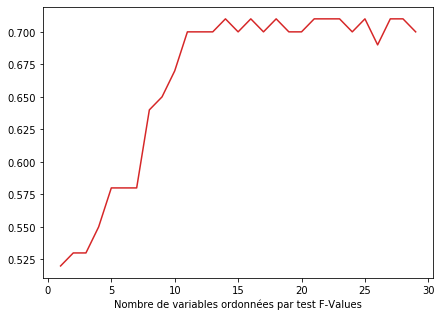

In [565]:
fig, ax1 = plt.subplots(figsize = (7,5))

plt.xlabel("Nombre de variables ordonnées par test F-Values", )

color = 'tab:red'
ax1.plot(ks1, list(f1_classif.values()), color = color, label = "f1" )
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

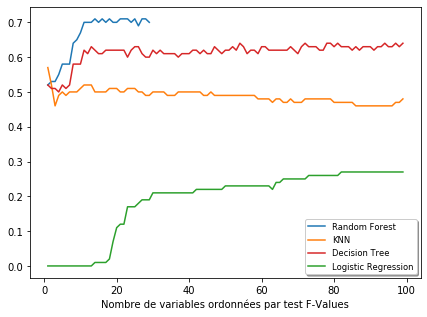

In [567]:
warnings.simplefilter('ignore')
fig, ax1 = plt.subplots(figsize = (7,5))

plt.xlabel("Nombre de variables ordonnées par test F-Values", )

color = 'tab:blue'
ax1.plot(ks, list(f1_classif.values()), color = color, label = "Random Forest")
color = 'tab:orange'
ax1.plot(ks, list(f1_classif_KNN.values()), color = color, label = "KNN")
color = 'tab:red'
ax1.plot(ks, list(f1_classif_DecisionTree.values()), color = color, label = "Decision Tree")
color = 'tab:green'
ax1.plot(ks, list(f1_classif_log.values()), color = color, label = "Logistic Regression")

legend = ax1.legend(loc='lower right', shadow=True, fontsize='small')
plt.show

We can see that the precision becames stable really fast and the recall starts stabilizes after reaching 250 covariates

Classifiers:  RandomForestClassifier Has a training precision of 79.0 %  and a test precision of 77.0 %
Classifiers:  RandomForestClassifier Has a recall of 63.0 %  and a test recall of 60.0 %
train confusion matrix
test confusion matrix


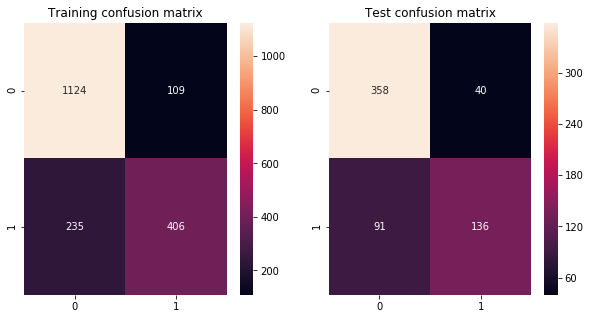

In [568]:
#Feature selection using Anova-f 
warnings.simplefilter('ignore')
X = df_num_zero
X = normalize(X)
y = df_new.disposition
y = y.map(mapping)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24)

fs = SelectKBest(score_func = f_classif, k = 14)
fs.fit(X_train, y_train)
X_train = fs.transform(X_train)
X_test = fs.transform(X_test)

regr = RandomForestClassifier()
regr.fit(X_train, y_train)

# model output for the input data
yp = cross_val_predict(regr, X_train, y_train, cv = 10)
precision = precision_score(y_train, yp)
recall = recall_score(y_train, yp)
yptest = regr.predict(X_test)
precisiontest = precision_score(y_test, yptest)
recalltest = recall_score(y_test, yptest)
confmat_train = confusion_matrix(y_train, yp)
confmat_test = confusion_matrix(y_test,yptest)

print("Classifiers: ", regr.__class__.__name__, "Has a training precision of", round(precision, 2) * 100, "% ",
     "and a test precision of", round(precisiontest, 2) * 100, "%")
print("Classifiers: ", regr.__class__.__name__, "Has a recall of", round(recall, 2) * 100, "% ",
     "and a test recall of", round(recalltest, 2) * 100, "%")

fig, ax1 = plt.subplots(1,2, figsize = (10,5))

print("train confusion matrix")
sn.heatmap(confmat_train, annot=True, fmt="d", ax = ax1[0])
ax1[0].title.set_text('Training confusion matrix')
print("test confusion matrix")
sn.heatmap(confmat_test, annot=True, fmt="d", ax = ax1[1])
ax1[1].title.set_text('Test confusion matrix')

In [570]:
warnings.simplefilter('ignore')
X = df_num_zero
X = normalize(X)
y = df_new.disposition
y = y.map(mapping)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24)

fs = SelectKBest(score_func = mutual_info_classif, k = 14)
fs.fit(X_train, y_train)
X_train = fs.transform(X_train)
X_test = fs.transform(X_test)

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier()
}

for key, classifier in classifiers.items():
    
    training_precision = cross_val_score(classifier, X_train, y_train, cv = 10)
    training_recall = cross_val_score(classifier, X_train, y_train, cv = 10, scoring = 'recall')
    classifier.fit(X_train, y_train)
    yptest = classifier.predict(X_test)
    precisiontest = precision_score(y_test, yptest)
    recalltest = recall_score(y_test, yptest)
    
    print("Classifiers: ", classifier.__class__.__name__, "Has a training precision of", round(training_precision.mean(), 2) * 100, "% accuracy score",
         "and a test precision of", round(precisiontest, 2) * 100, "%")
    print("Classifiers: ", classifier.__class__.__name__, "Has a training recall of", round(training_recall.mean(), 2) * 100, "% accuracy score",
         "and a test recall of", round(recalltest, 2) * 100, "%")

Classifiers:  LogisticRegression Has a training precision of 66.0 % accuracy score and a test precision of 0.0 %
Classifiers:  LogisticRegression Has a training recall of 0.0 % accuracy score and a test recall of 0.0 %
Classifiers:  KNeighborsClassifier Has a training precision of 74.0 % accuracy score and a test precision of 77.0 %
Classifiers:  KNeighborsClassifier Has a training recall of 47.0 % accuracy score and a test recall of 52.0 %
Classifiers:  DecisionTreeClassifier Has a training precision of 76.0 % accuracy score and a test precision of 75.0 %
Classifiers:  DecisionTreeClassifier Has a training recall of 56.00000000000001 % accuracy score and a test recall of 56.00000000000001 %
Classifiers:  RandomForestClassifier Has a training precision of 81.0 % accuracy score and a test precision of 78.0 %
Classifiers:  RandomForestClassifier Has a training recall of 61.0 % accuracy score and a test recall of 60.0 %


In [114]:
#PCA
pca = PCA(n_components = 10)
pca.fit(df_num_zero)
pca_X = pca.transform(df_num_zero)
pca.explained_variance_ratio_

array([0.73582948, 0.08089088, 0.04721882, 0.03108048, 0.02432543,
       0.00971059, 0.00964749, 0.00914728, 0.00873402, 0.00552649])

In [115]:
pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

0.8167203619082767

The sum of the 2 first terms is 82%, it means that the first 2 terms of the PCA explain 82% of the variance

In [550]:
#PCA with 2 components

pca = PCA(n_components = 2)
pca.fit(df_num_zero)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [551]:
X = df_num_zero
X = normalize(X)
pca_X = pca.fit_transform(X, y)

In [552]:
df_pca = pd.DataFrame(np.transpose(np.array((np.transpose(pca_X)[0],np.transpose(pca_X)[1], y.astype(int)))), 
                      columns = ("PC1","PC2","disposition"))
df_pca.disposition = df_pca.disposition.astype('int')


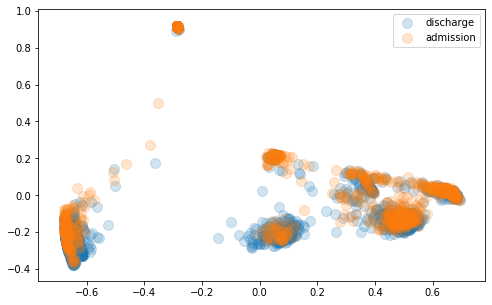

In [400]:
pca_X = pca.fit_transform(X, y)

colors = ['tab:blue', 'tab:orange']
labels = ['discharge','admission']

fig, ax = plt.subplots(figsize = (8, 5))

for i in range(len(colors)):
    
    x1 = df_pca["PC1"].loc[df_pca["disposition"] == i]
    x2 = df_pca["PC2"].loc[df_pca["disposition"] == i]
    ax.scatter(x1, x2, c = colors[i], label = labels[i],s = 100, alpha = 0.2)

ax.legend(loc = "upper right")
plt.show()

We can see that at 150 covariates, the precision and recall become stable.

Classifiers:  RandomForestClassifier Has a training precision of 77.0 %  and a test precision of 80.0 %
Classifiers:  RandomForestClassifier Has a recall of 63.0 %  and a test recall of 61.0 %
train confusion matrix
test confusion matrix


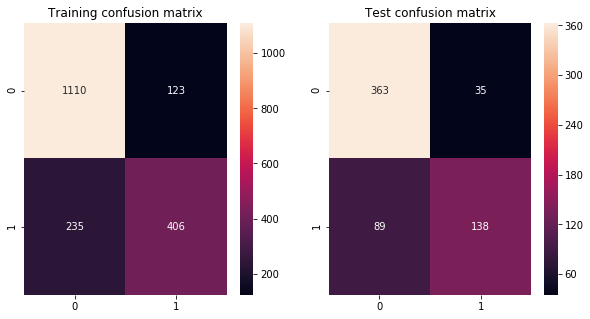

In [155]:

X = df_num_zero
X = normalize(X)
pca = PCA(n_components = 2)
pca.fit_transform(X)
y = df_new.disposition
y = y.map(mapping)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24)

regr = RandomForestClassifier()
regr.fit(X_train, y_train)

# model output for the input data
yp = cross_val_predict(regr, X_train, y_train, cv = 10)
precision = precision_score(y_train, yp)
recall = recall_score(y_train, yp)
yptest = regr.predict(X_test)
precisiontest = precision_score(y_test, yptest)
recalltest = recall_score(y_test, yptest)
confmat_train = confusion_matrix(y_train, yp)
confmat_test = confusion_matrix(y_test,yptest)

print("Classifiers: ", regr.__class__.__name__, "Has a training precision of", round(precision, 2) * 100, "% ",
     "and a test precision of", round(precisiontest, 2) * 100, "%")
print("Classifiers: ", regr.__class__.__name__, "Has a recall of", round(recall, 2) * 100, "% ",
     "and a test recall of", round(recalltest, 2) * 100, "%")

fig, ax1 = plt.subplots(1,2, figsize = (10,5))

print("train confusion matrix")
sn.heatmap(confmat_train, annot=True, fmt="d", ax = ax1[0])
ax1[0].title.set_text('Training confusion matrix')
print("test confusion matrix")
sn.heatmap(confmat_test, annot=True, fmt="d", ax = ax1[1])
ax1[1].title.set_text('Test confusion matrix')

In [479]:
X = df_num_zero
X = normalize(X)
pca = PCA(n_components = 2)
pca.fit_transform(X)
y = df_new.disposition
y = y.map(mapping)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24)
confmats = []

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier()
}

for key, classifier in classifiers.items():
    
    yp = cross_val_predict(classifier, X_train, y_train, cv = 10)
    training_precision = cross_val_score(classifier, X_train, y_train, cv = 10)
    training_recall = cross_val_score(classifier, X_train, y_train, cv = 10, scoring = 'recall')
    classifier.fit(X_train, y_train)
    yptest = classifier.predict(X_test)
    precisiontest = precision_score(y_test, yptest)
    recalltest = recall_score(y_test, yptest)
    confmats.append(confusion_matrix(y_train, yp))
    f1 = f1_score(y_test, yptest)
    
    print("Classifiers: ", classifier.__class__.__name__, "Has a training precision of", round(training_precision.mean(), 2) * 100, "% accuracy score",
         "and a test precision of", round(precisiontest, 2) * 100, "%")
    print("Classifiers: ", classifier.__class__.__name__, "Has a training recall of", round(training_recall.mean(), 2) * 100, "% accuracy score",
         "and a test recall of", round(recalltest, 2) * 100, "%")
    print("Classifiers: ", classifier.__class__.__name__,
         "Has a test f1 score of", round(f1, 2) * 100, "%")

Classifiers:  LogisticRegression Has a training precision of 71.0 % accuracy score and a test precision of 78.0 %
Classifiers:  LogisticRegression Has a training recall of 35.0 % accuracy score and a test recall of 37.0 %
Classifiers:  LogisticRegression Has a test f1 score of 50.0 %
Classifiers:  KNeighborsClassifier Has a training precision of 70.0 % accuracy score and a test precision of 56.99999999999999 %
Classifiers:  KNeighborsClassifier Has a training recall of 38.0 % accuracy score and a test recall of 37.0 %
Classifiers:  KNeighborsClassifier Has a test f1 score of 45.0 %
Classifiers:  DecisionTreeClassifier Has a training precision of 74.0 % accuracy score and a test precision of 64.0 %
Classifiers:  DecisionTreeClassifier Has a training recall of 63.0 % accuracy score and a test recall of 63.0 %
Classifiers:  DecisionTreeClassifier Has a test f1 score of 64.0 %
Classifiers:  RandomForestClassifier Has a training precision of 81.0 % accuracy score and a test precision of 80.

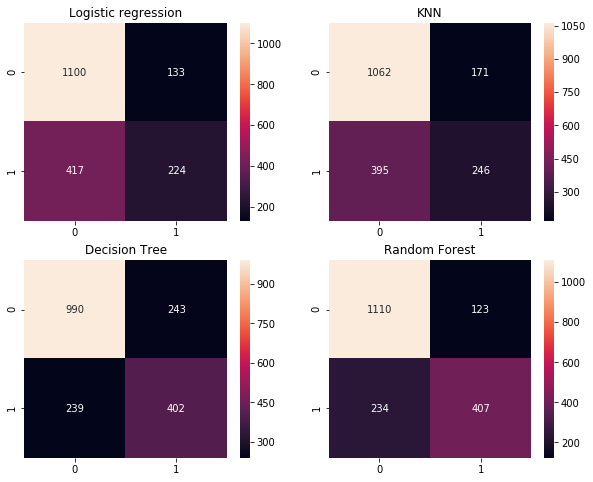

In [322]:
fig, ax = plt.subplots(2, 2, figsize = (10, 8))
sn.heatmap(confmats[0], annot=True, fmt="d", ax = ax[0,0])
ax[0,0].title.set_text('Logistic regression')
sn.heatmap(confmats[1], annot=True, fmt="d", ax = ax[0,1])
ax[0,1].title.set_text('KNN')
sn.heatmap(confmats[2], annot=True, fmt="d", ax = ax[1,0])
ax[1,0].title.set_text('Decision Tree')
sn.heatmap(confmats[3], annot=True, fmt="d", ax = ax[1,1])
ax[1,1].title.set_text('Random Forest')

In [323]:
def pls_da(X_train,y_train, X_test, i):
    
    # Define the PLS object for binary classification
    plsda = PLSRegression(n_components = i)
    
    # Fit the training set
    plsda.fit(X_train, y_train)
    
    # Binary prediction on the test set, done with thresholding
    binary_prediction = (plsda.predict(X_test)[:,0] > 0.5).astype('uint8')
    
    return binary_prediction

In [571]:
#PLS-DA

PLS_range = range(1,20,1)
PLS_precisions = []
PLS_recalls = []

for i in PLS_range:
    #pls_binary = PLSRegression(n_components=i)
    X = df_num_zero
    X = normalize(X)
    y = df_new.disposition
    y = y.map(mapping)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24)
    #pls_binary.fit(X_train, y_train)
    
    accuracy = []
    recalls = []
    cval = KFold(n_splits = 10, shuffle = True, random_state = 24)
    
    for train, test in cval.split(X_train):
        y_pred = pls_da(X_train[train,:], y_train.iloc[train], X_train[test,:], i)
        accuracy.append(precision_score(y_train.iloc[test], y_pred))
        recalls.append(recall_score(y_train.iloc[test], y_pred))
    
    # model output for the input data
    score = np.array(accuracy).mean()
    recall = np.array(recalls).mean()
    PLS_precisions.append(score)
    PLS_recalls.append(recall)


<function matplotlib.pyplot.show(*args, **kw)>

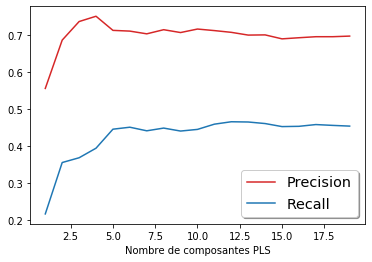

In [330]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(PLS_range, PLS_precisions, color = color, label = "Precision")

#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax1.plot(PLS_range, PLS_recalls, color = color, label = "Recall")
ax1.set_xlabel("Nombre de composantes PLS")
legend = ax1.legend(loc='lower right', shadow=True, fontsize='x-large')
plt.show

In [1005]:
#PLS-DA 5 components

X = df_num_zero
X = normalize(X)
y = df_new.disposition
y = y.map(mapping)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24)
#pls_binary.fit(X_train, y_train)
    
accuracy = []
recalls = []
cval = KFold(n_splits = 10, shuffle = True, random_state = 24)
    
for train, test in cval.split(X_train):
    y_pred = pls_da(X_train[train,:], y_train.iloc[train], X_train[test,:], 5)
    accuracy.append(precision_score(y_train.iloc[test], y_pred))
    recalls.append(recall_score(y_train.iloc[test], y_pred))
    
# model output for the input data
score = np.array(accuracy).mean()
recall = np.array(recalls).mean()
print("Classifiers: ", pls_binary.__class__.__name__, "Has a precision of", round(score, 2) * 100, "% ")
print("Classifiers: ", pls_binary.__class__.__name__, "Has a recall  of", round(recall, 2) * 100, "% ")



Classifiers:  PLSRegression Has a precision of 71.0 % 
Classifiers:  PLSRegression Has a recall  of 45.0 % 


### Categorical variables 

In [544]:
X = df_categ_dummies
y = df_new.disposition
y = y.map(mapping)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24)

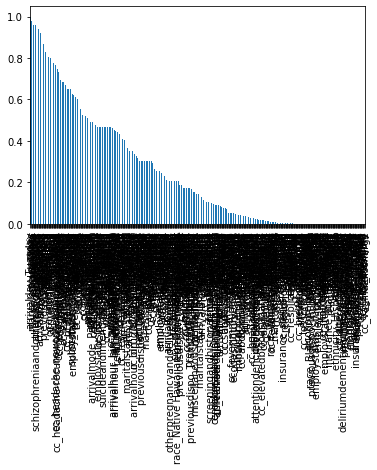

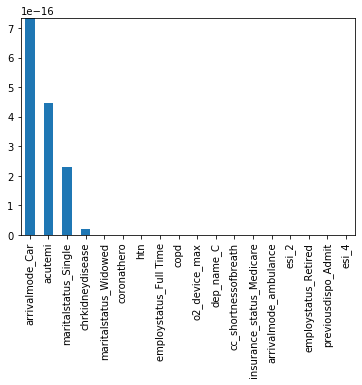

In [545]:
#To select covariate we will  a Chi2 independance test
#Null hypothesis H0: Two variables are independant

alpha=10**-15

count_nan = len(X) - X.count()
chi2_scores = list(chi2(X.iloc[:, :], y))


pval = [c for c in chi2_scores[1]]

p_values = pd.Series(chi2_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

covariate_retained = p_values.where(p_values<alpha).dropna().index.to_list()

cov_bis = []
p=1
X_inc = X.copy()

p_values.plot.bar()
plt.show()


p_values.where(p_values<alpha).dropna().plot.bar()


In [334]:
#Using all categorical variables

X = df_categ_dummies
y = df_new.disposition
y = y.map(mapping)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24)
confmats = []
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier()
}

for key, classifier in classifiers.items():
    
    yp = cross_val_predict(classifier, X_train, y_train, cv = 10)
    training_precision = cross_val_score(classifier, X_train, y_train, cv = 10)
    training_recall = cross_val_score(classifier, X_train, y_train, cv = 10, scoring = 'recall')
    classifier.fit(X_train, y_train)
    yptest = classifier.predict(X_test)
    precisiontest = precision_score(y_test, yptest)
    recalltest = recall_score(y_test, yptest)
    confmats.append(confusion_matrix(y_train, yp))
    
    print("Classifiers: ", classifier.__class__.__name__, "Has a training precision of", round(training_precision.mean(), 2) * 100, "% accuracy score",
         "and a test precision of", round(precisiontest, 2) * 100, "%")
    print("Classifiers: ", classifier.__class__.__name__, "Has a training recall of", round(training_recall.mean(), 2) * 100, "% accuracy score",
         "and a test recall of", round(recalltest, 2) * 100, "%")
    

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

Classifiers:  LogisticRegression Has a training precision of 76.0 % accuracy score and a test precision of 70.0 %
Classifiers:  LogisticRegression Has a training recall of 59.0 % accuracy score and a test recall of 61.0 %
Classifiers:  KNeighborsClassifier Has a training precision of 74.0 % accuracy score and a test precision of 70.0 %
Classifiers:  KNeighborsClassifier Has a training recall of 48.0 % accuracy score and a test recall of 47.0 %
Classifiers:  DecisionTreeClassifier Has a training precision of 70.0 % accuracy score and a test precision of 55.00000000000001 %
Classifiers:  DecisionTreeClassifier Has a training recall of 56.00000000000001 % accuracy score and a test recall of 53.0 %
Classifiers:  RandomForestClassifier Has a training precision of 78.0 % accuracy score and a test precision of 74.0 %
Classifiers:  RandomForestClassifier Has a training recall of 55.00000000000001 % accuracy score and a test recall of 52.0 %


In [548]:

alpha=10**-15


chi2_scores = list(chi2(X.iloc[:, :], y))


pval= [c for c in chi2_scores[1]]

p_values = pd.Series(chi2_scores[1],index = X.columns[:])
p_values.sort_values(ascending = True , inplace = True)
p_values.dropna(inplace=True)

covariate_retained = p_values.dropna().index.to_list()

cov_bis = []
p=1
X_inc = X.copy()

acc_lr=[]
acc_knn=[]
acc_dc=[]
acc_rf=[]
rec_lr=[]
rec_knn=[]
rec_dc=[]
rec_rf=[]
f1_lr=[]
f1_knn=[]
f1_dc=[]
f1_rf=[]


classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier()}

a=0
for key, classifier in classifiers.items():
    a+=1
    for i in range(len(covariate_retained)):
        #print("%s covariates" %i)
        X_training = X_train[list(covariate_retained[:i+1])]
        y_training = y_train

        classifier.fit(X_training, y_training)
        y_pred = cross_val_predict(classifier, X_training, y_training, cv = 10)
        
        if a==1:
            acc_lr.append(precision_score(y_training, y_pred))
            rec_lr.append(recall_score(y_training, y_pred))
            f1_lr.append(f1_score(y_training, y_pred))
        elif a==2:
            acc_knn.append(precision_score(y_training, y_pred))
            rec_knn.append(recall_score(y_training, y_pred))
            f1_knn.append(f1_score(y_training, y_pred))
        elif a==3:
            acc_dc.append(precision_score(y_training, y_pred))
            rec_dc.append(recall_score(y_training, y_pred))
            f1_dc.append(f1_score(y_training, y_pred))
        elif a==4:
            acc_rf.append(precision_score(y_training, y_pred))
            rec_rf.append(recall_score(y_training, y_pred))
            f1_rf.append(f1_score(y_training, y_pred))
        
        
classif = ['LR', 'KNN', 'DC', 'RF']
fig = plt.figure(figsize = (18,6))    
x = [c for c in range(len(covariate_retained))]

for i in range(1,4):
    ax = fig.add_subplot(1, 4, i+1)
    #print(i)
    if i==1:
        ax.plot(x, acc_lr, label='Acc_LR')
        ax.plot(x, acc_knn, label='Acc_KNN')
        ax.plot(x, acc_dc, label='Acc_DC')
        ax.plot(x, acc_rf, label='Acc_RF')
    elif i==2:
        ax.plot(x, rec_lr, label='Rec_LR')
        ax.plot(x, rec_knn, label='Rec_KNN')
        ax.plot(x, rec_dc, label='Rec_DC')
        ax.plot(x, rec_rf, label='Rec_RF')
    elif i==3:
        ax.plot(x, f1_lr, label='f1_LR')
        ax.plot(x, f1_knn, label='f1_KNN')
        ax.plot(x, f1_dc, label='f1_DC')
        ax.plot(x, f1_rf, label='f1_RF')   
        
    ax.set_xlabel('Number of categorical variables')
    ax.set_ylabel('Score')
    plt.legend(loc="upper right")
    
fig.suptitle('Performance of the different algorithms over Accuracy/Recall/F1-Score metrics', fontsize = 16)
plt.show()


x = [c for c in range(len(covariate_retained[:20]))]

for i in range(1,4):
    ax = fig.add_subplot(1, 4, i+1)
    #print(i)
    if i==1:
        ax.plot(x, acc_lr[:20], label='Acc_LR')
        ax.plot(x, acc_knn[:20], label='Acc_KNN')
        ax.plot(x, acc_dc[:20], label='Acc_DC')
        ax.plot(x, acc_rf[:20], label='Acc_RF')
    elif i==2:
        ax.plot(x, rec_lr[:20], label='Rec_LR')
        ax.plot(x, rec_knn[:20], label='Rec_KNN')
        ax.plot(x, rec_dc[:20], label='Rec_DC')
        ax.plot(x, rec_rf[:20], label='Rec_RF')
    elif i==3:
        ax.plot(x, f1_lr[:20], label='f1_LR')
        ax.plot(x, f1_knn[:20], label='f1_KNN')
        ax.plot(x, f1_dc[:20], label='f1_DC')
        ax.plot(x, f1_rf[:20], label='f1_RF')   
        
    ax.set_xlabel('Number of categorical variables')
    ax.set_ylabel('Score')
    plt.legend(loc="upper right")


print("Accuracy: %s:%s, %s:%s, %s:%s, %s:%s", ('LR', acc_lr[:20].index(max(acc_lr[:20]))),
      ('KNN', acc_knn[:20].index(max(acc_knn[:20]))), ('DC', acc_dc[:20].index(max(acc_dc[:20]))),
      ('RF', acc_rf[:20].index(max(acc_rf[:20]))))
print("Recall: %s:%s, %s:%s, %s:%s, %s:%s", ('LR', rec_lr[:20].index(max(rec_lr[:20]))),
      ('KNN', rec_knn[:20].index(max(rec_knn[:20]))), ('DC', rec_dc[:20].index(max(rec_dc[:20]))),
      ('RF', rec_rf[:20].index(max(rec_rf[:20]))))
print("f1-score: %s:%s, %s:%s, %s:%s, %s:%s", ('LR', f1_lr[:20].index(max(f1_lr[:20]))),
      ('KNN', f1_knn[:20].index(max(f1_knn[:20]))), ('DC', f1_dc[:20].index(max(f1_dc[:20]))),
      ('RF', f1_rf[:20].index(max(f1_rf[:20]))))

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REA

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

KeyboardInterrupt: 

In [ ]:
import mca
print(mca.MCA.__doc__)
print(dir(mca.MCA))
mca_ben = mca.MCA(X)
mca_ind = mca.MCA(X, benzecri=False)

In [ ]:
mc1 = [row[0] for row in mca_ben.fs_r(N=2)]
mc2 = [row[1] for row in mca_ben.fs_r(N=2)]
sn.scatterplot(mc1, mc2, hue=y)
plt.show()

In [ ]:
X_mca=mca_ben.fs_r(N=2)
X_train, X_test, y_train, y_test = train_test_split(X_mca, y, random_state = 24)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = cross_val_predict(lr, X_train, y_train, cv = 10)
report = classification_report(y_train, y_pred)
print(report)

acc_av=[]
rec_av=[]
f1_av=[]
for i in range(len(covariate_retained)):
    X_mca=mca_ben.fs_r(N=i)
    X_train, X_test, y_train, y_test = train_test_split(X_mca, y, random_state = 24)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = cross_val_predict(lr, X_train, y_train, cv = 10)
    report = classification_report(y_train, y_pred)
    acc_av.append(precision_score(y_train, y_pred))
    rec_av.append(recall_score(y_train, y_pred))
    f1_av.append(f1_score(y_train, y_pred))
    
x = [c for c in range(len(covariate_retained))]
plt.plot(x, acc_av, label='Accuracy')
plt.plot(x, rec_av, label='Recall')
plt.plot(x, f1_av, label='f1-score')
plt.legend()
plt.show() 

print(acc_av.index(max(acc_av)))
print(rec_av.index(max(rec_av)))
print(f1_av.index(max(f1_av)))

print(acc_av[:20].index(max(acc_av[:20])))
print(rec_av[:20].index(max(rec_av[:20])))
print(f1_av[:20].index(max(f1_av[:20])))


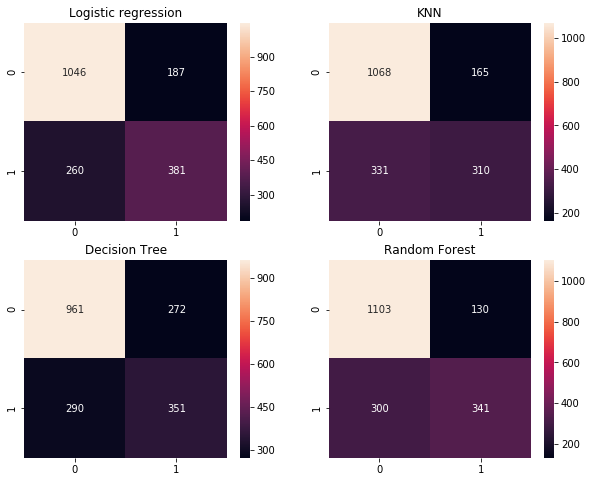

In [335]:
fig, ax = plt.subplots(2, 2, figsize = (10, 8))
sn.heatmap(confmats[0], annot=True, fmt="d", ax = ax[0,0])
ax[0,0].title.set_text('Logistic regression')
sn.heatmap(confmats[1], annot=True, fmt="d", ax = ax[0,1])
ax[0,1].title.set_text('KNN')
sn.heatmap(confmats[2], annot=True, fmt="d", ax = ax[1,0])
ax[1,0].title.set_text('Decision Tree')
sn.heatmap(confmats[3], annot=True, fmt="d", ax = ax[1,1])
ax[1,1].title.set_text('Random Forest')

In [355]:
X = df_categ_dummies
y = df_new.disposition
y = y.map(mapping)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24)
kbest = SelectKBest(chi2, k="all")
kbest.fit(X, y)

SelectKBest(k='all', score_func=<function chi2 at 0x000001D5C19A7948>)

In [371]:
columns = list(df_categ_dummies.columns)
Kbest = []
for i in range(len(kbest.pvalues_)):
    Kbest.append(kbest.pvalues_[i])

The variables in order choosen by Chi2

In [381]:
pd.DataFrame(Kbest, index = columns).sort_values(by =0)

,0
esi_4,4.078783e-50
previousdispo_Admit,7.129264e-44
employstatus_Retired,3.159183e-42
esi_2,5.276662e-40
arrivalmode_ambulance,1.363337e-30
...,...
cc_ingestion,NaN
cc_rectalbleeding,NaN
cc_sicklecellpain,NaN
cc_toeinjury,NaN


In [342]:
recalls_chi2 = []
precisions_chi2 = []
range_chi2 = range(1,100)

for i in range_chi2:
    
    X = df_categ_dummies
    y = df_new.disposition
    y = y.map(mapping)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24)
    kbest = SelectKBest(chi2, k=i)
    X_train = kbest.fit_transform(X_train, y_train)
    X_test = kbest.transform(X_test)

    regr = LogisticRegression()
    regr.fit(X_train, y_train)

    # model output for the input data
    
    yp = regr.predict(X_test)
    score = cross_val_score(regr, X_train, y_train, cv = 10)
    recall = cross_val_score(regr, X_train, y_train, scoring = "recall", cv = 10)
    precisions_chi2.append(round(score.mean(),2))
    recalls_chi2.append(round(recall.mean(), 2))

    

<function matplotlib.pyplot.show(*args, **kw)>

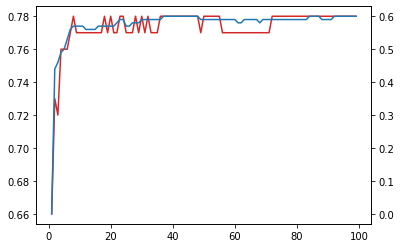

In [344]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(range_chi2, precisions_chi2, color = color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.plot(range_chi2, recalls_chi2, color = color)

plt.show

In [266]:
X = df_categ_dummies
y = df_new.disposition
y = y.map(mapping)
kbest = SelectKBest(chi2, k = 15)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24)
X_train = kbest.fit_transform(X_train, y_train)
X_test = kbest.transform(X_test)

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier()
}

for key, classifier in classifiers.items():
    
    training_precision = cross_val_score(classifier, X_train, y_train, cv = 10)
    training_recall = cross_val_score(classifier, X_train, y_train, cv = 10, scoring = 'recall')
    classifier.fit(X_train, y_train)
    yptest = classifier.predict(X_test)
    precisiontest = precision_score(y_test, yptest)
    recalltest = recall_score(y_test, yptest)
    
    print("Classifiers: ", classifier.__class__.__name__, "Has a training precision of", round(training_precision.mean(), 2) * 100, "% accuracy score",
         "and a test precision of", round(precisiontest, 2) * 100, "%")
    print("Classifiers: ", classifier.__class__.__name__, "Has a training recall of", round(training_recall.mean(), 2) * 100, "% accuracy score",
         "and a test recall of", round(recalltest, 2) * 100, "%")
    

Classifiers:  LogisticRegression Has a training precision of 74.0 % accuracy score and a test precision of 71.0 %
Classifiers:  LogisticRegression Has a training recall of 48.0 % accuracy score and a test recall of 48.0 %
Classifiers:  KNeighborsClassifier Has a training precision of 70.0 % accuracy score and a test precision of 50.0 %
Classifiers:  KNeighborsClassifier Has a training recall of 56.00000000000001 % accuracy score and a test recall of 64.0 %
Classifiers:  DecisionTreeClassifier Has a training precision of 74.0 % accuracy score and a test precision of 68.0 %
Classifiers:  DecisionTreeClassifier Has a training recall of 49.0 % accuracy score and a test recall of 43.0 %
Classifiers:  RandomForestClassifier Has a training precision of 74.0 % accuracy score and a test precision of 69.0 %
Classifiers:  RandomForestClassifier Has a training recall of 51.0 % accuracy score and a test recall of 48.0 %


# Categorical and numerical

In [504]:
X = df_num_zero
X = normalize(X)
y = df_new.disposition
y = y.map(mapping)
fs = SelectKBest(score_func = f_classif, k = "all")
fs.fit(X, y)
columns = list(df_num_zero.columns)
df_Anova = pd.DataFrame(fs.pvalues_, index=columns).sort_values(by=0)
list_num = list(df_Anova.index[:7])

C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 49 122 195 268] are constant.
  UserWarning)
C:\Users\huawie\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [505]:
list_num

['meds_cardiovascular',
 'triage_vital_dbp',
 'meds_diuretics',
 'triage_vital_temp',
 'triage_vital_sbp',
 'meds_gastrointestinal',
 'triage_vital_hr']

In [506]:
X = df_categ_dummies
y = df_new.disposition
y = y.map(mapping)
kbest = SelectKBest(chi2, k="all")
kbest.fit(X, y)
columns = list(df_categ_dummies.columns)
df_chi2 = pd.DataFrame(kbest.pvalues_, index=columns).sort_values(by=0)
list_categ = list(df_chi2.index[:8])

In [507]:
list_categ

['esi_4',
 'previousdispo_Admit',
 'employstatus_Retired',
 'esi_2',
 'arrivalmode_ambulance',
 'insurance_status_Medicare',
 'cc_shortnessofbreath',
 'dep_name_C']

In [513]:
df_num_normalized = pd.DataFrame(normalize(df_num_zero.loc[:, list_num]), 
                                 columns = df_num_zero.loc[:, list_num].columns,
                                index = range(1,2500))
X = pd.concat((df_categ_dummies.loc[:, list_categ], df_num_normalized), axis = 1)
y = df_new.disposition
y = y.map(mapping)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24)
confmats = []
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier()
}

for key, classifier in classifiers.items():
    
    classifier.fit(X_train, y_train)
    yp = cross_val_predict(classifier, X_train, y_train, cv = 10)
    precision = precision_score(y_train, yp)
    recall = recall_score(y_train, yp)
    yptest = classifier.predict(X_test)
    precisiontest = precision_score(y_test, yptest)
    recalltest = recall_score(y_test, yptest)
    confmats.append(confusion_matrix(y_test, yptest))
    
    print("Classifiers: ", classifier.__class__.__name__, "Has a training precision of", round(precision, 2) * 100, "% accuracy score",
         "and a test precision of", round(precisiontest, 2) * 100, "%")
    print("Classifiers: ", classifier.__class__.__name__, "Has a training recall of", round(recall.mean(), 2) * 100, "% accuracy score",
         "and a test recall of", round(recalltest, 2) * 100, "%")
    

Classifiers:  LogisticRegression Has a training precision of 76.0 % accuracy score and a test precision of 76.0 %
Classifiers:  LogisticRegression Has a training recall of 56.99999999999999 % accuracy score and a test recall of 56.00000000000001 %
Classifiers:  KNeighborsClassifier Has a training precision of 71.0 % accuracy score and a test precision of 74.0 %
Classifiers:  KNeighborsClassifier Has a training recall of 56.00000000000001 % accuracy score and a test recall of 56.99999999999999 %
Classifiers:  DecisionTreeClassifier Has a training precision of 68.0 % accuracy score and a test precision of 72.0 %
Classifiers:  DecisionTreeClassifier Has a training recall of 65.0 % accuracy score and a test recall of 61.0 %
Classifiers:  RandomForestClassifier Has a training precision of 83.0 % accuracy score and a test precision of 80.0 %
Classifiers:  RandomForestClassifier Has a training recall of 67.0 % accuracy score and a test recall of 56.99999999999999 %


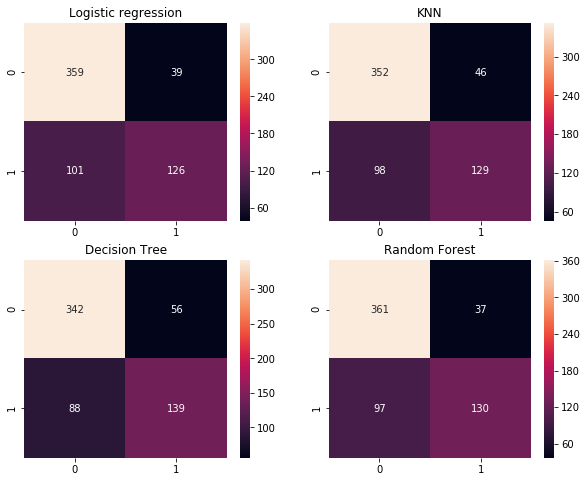

In [511]:
fig, ax = plt.subplots(2, 2, figsize = (10, 8))
sn.heatmap(confmats[0], annot=True, fmt="d", ax = ax[0,0])
ax[0,0].title.set_text('Logistic regression')
sn.heatmap(confmats[1], annot=True, fmt="d", ax = ax[0,1])
ax[0,1].title.set_text('KNN')
sn.heatmap(confmats[2], annot=True, fmt="d", ax = ax[1,0])
ax[1,0].title.set_text('Decision Tree')
sn.heatmap(confmats[3], annot=True, fmt="d", ax = ax[1,1])
ax[1,1].title.set_text('Random Forest')

# Conclusion

16
14
['esi_4', 'previousdispo_Admit', 'employstatus_Retired', 'arrivalmode_ambulance', 'insurance_status_Medicare', 'esi_2', 'cc_shortnessofbreath', 'dep_name_C', 'o2_device_max', 'copd', 'employstatus_Full Time', 'htn', 'coronathero', 'maritalstatus_Widowed', 'chrkidneydisease', 'maritalstatus_Single', 'meds_cardiovascular', 'triage_vital_dbp', 'triage_vital_temp', 'triage_vital_sbp', 'meds_diuretics', 'triage_vital_hr', 'triage_vital_rr', 'meds_gastrointestinal', 'meds_antiplateletdrugs', 'meds_analgesics', 'n_admissions', 'meds_cardiacdrugs', 'meds_psychotherapeuticdrugs', 'bun_max']
Index(['esi_4', 'previousdispo_Admit', 'employstatus_Retired', 'esi_2',
       'arrivalmode_ambulance', 'insurance_status_Medicare',
       'cc_shortnessofbreath', 'dep_name_C', 'meds_cardiovascular',
       'triage_vital_dbp', 'meds_diuretics', 'triage_vital_temp',
       'triage_vital_sbp', 'meds_gastrointestinal', 'triage_vital_hr'],
      dtype='object')
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.0

proportion numerical/categorical covariates: 0.97%/0.030000000000000027% 
14 0
proportion numerical/categorical covariates: 0.98%/0.020000000000000018% 
14 0
proportion numerical/categorical covariates: 0.99%/0.010000000000000009% 
14 0
proportion numerical/categorical covariates: 1.0%/0.0% 
14 0
proportion numerical/categorical covariates: 0.0%/1.0% 
0 16
proportion numerical/categorical covariates: 0.01%/0.99% 
0 16
proportion numerical/categorical covariates: 0.02%/0.98% 
0 16
proportion numerical/categorical covariates: 0.03%/0.97% 
0 16
proportion numerical/categorical covariates: 0.04%/0.96% 
1 15
proportion numerical/categorical covariates: 0.05%/0.95% 
1 15
proportion numerical/categorical covariates: 0.06%/0.94% 
1 15
proportion numerical/categorical covariates: 0.07%/0.9299999999999999% 
1 15
proportion numerical/categorical covariates: 0.08%/0.92% 
1 15
proportion numerical/categorical covariates: 0.09%/0.91% 
1 15
proportion numerical/categorical covariates: 0.1%/0.9% 
1 14

proportion numerical/categorical covariates: 0.14%/0.86% 
2 14
proportion numerical/categorical covariates: 0.15%/0.85% 
2 14
proportion numerical/categorical covariates: 0.16%/0.84% 
2 13
proportion numerical/categorical covariates: 0.17%/0.83% 
2 13
proportion numerical/categorical covariates: 0.18%/0.8200000000000001% 
3 13
proportion numerical/categorical covariates: 0.19%/0.81% 
3 13
proportion numerical/categorical covariates: 0.2%/0.8% 
3 13
proportion numerical/categorical covariates: 0.21%/0.79% 
3 13
proportion numerical/categorical covariates: 0.22%/0.78% 
3 12
proportion numerical/categorical covariates: 0.23%/0.77% 
3 12
proportion numerical/categorical covariates: 0.24%/0.76% 
3 12
proportion numerical/categorical covariates: 0.25%/0.75% 
4 12
proportion numerical/categorical covariates: 0.26%/0.74% 
4 12
proportion numerical/categorical covariates: 0.27%/0.73% 
4 12
proportion numerical/categorical covariates: 0.28%/0.72% 
4 12
proportion numerical/categorical covariates

proportion numerical/categorical covariates: 0.32%/0.6799999999999999% 
4 11
proportion numerical/categorical covariates: 0.33%/0.6699999999999999% 
5 11
proportion numerical/categorical covariates: 0.34%/0.6599999999999999% 
5 11
proportion numerical/categorical covariates: 0.35000000000000003%/0.6499999999999999% 
5 10
proportion numerical/categorical covariates: 0.36%/0.64% 
5 10
proportion numerical/categorical covariates: 0.37%/0.63% 
5 10
proportion numerical/categorical covariates: 0.38%/0.62% 
5 10
proportion numerical/categorical covariates: 0.39%/0.61% 
5 10
proportion numerical/categorical covariates: 0.4%/0.6% 
6 10
proportion numerical/categorical covariates: 0.41000000000000003%/0.59% 
6 9
proportion numerical/categorical covariates: 0.42%/0.5800000000000001% 
6 9
proportion numerical/categorical covariates: 0.43%/0.5700000000000001% 
6 9
proportion numerical/categorical covariates: 0.44%/0.56% 
6 9
proportion numerical/categorical covariates: 0.45%/0.55% 
6 9
proportion 

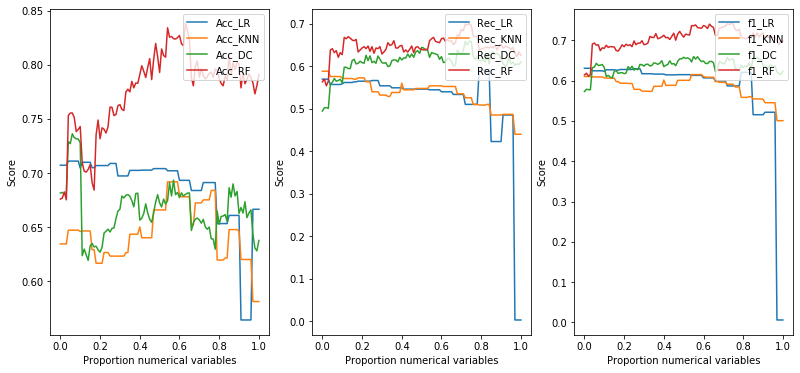

In [515]:


covariate_cat=['esi_4','previousdispo_Admit', 'employstatus_Retired', 'arrivalmode_ambulance', 
               'insurance_status_Medicare', 'esi_2' , 'cc_shortnessofbreath', 'dep_name_C', 'o2_device_max',
               'copd', 'employstatus_Full Time', 'htn', 'coronathero', 'maritalstatus_Widowed', 'chrkidneydisease',
               'maritalstatus_Single']


covariate_num=['meds_cardiovascular', 'triage_vital_dbp', 'triage_vital_temp','triage_vital_sbp','meds_diuretics',
               'triage_vital_hr', 'triage_vital_rr', 'meds_gastrointestinal', 'meds_antiplateletdrugs', 'meds_analgesics', 'n_admissions',
               'meds_cardiacdrugs', 'meds_psychotherapeuticdrugs', 'bun_max']



print(len(covariate_cat))
print(len(covariate_num))

cov_fin = covariate_cat+covariate_num
print(cov_fin)

print(X.columns)
df_num_normalized2 = pd.DataFrame(normalize(df_num.fillna(0)), 
                                 columns = df_num.columns,
                                index = range(1,2500))
X_conc = pd.concat([df_num_normalized2, df_categ_dummies], axis=1)
X_conc = X_conc[cov_fin]
y_conc = y

X_final, X_test, y_final, y_test = train_test_split(X_conc, y_conc, random_state = 24)




acc_lr=[]
acc_knn=[]
acc_dc=[]
acc_rf=[]
rec_lr=[]
rec_knn=[]
rec_dc=[]
rec_rf=[]
f1_lr=[]
f1_knn=[]
f1_dc=[]
f1_rf=[]


classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier()}

range_def=np.linspace(0, 1, 101)
print(range_def)
a=0
for key, classifier in classifiers.items():
    a+=1
    #print("a=%s, classifieur:%s" %(a,classifier))
    for i in range_def:
        print("proportion numerical/categorical covariates: %s%%/%s%% " %(i, 1-i))
        cutoff_num = int(round(len(covariate_num)*i,0))
        cutoff_cat = int(round(len(covariate_cat)*(1-i),0))
        print(cutoff_num, cutoff_cat)
        
        cov_selected = covariate_cat[:cutoff_cat]+covariate_num[:cutoff_num]
        
        X_training = X_final[cov_selected]
        y_training = y_final

        classifier.fit(X_training, y_training)
        y_pred = cross_val_predict(classifier, X_training, y_training, cv = 10)
        
        if a==1:
            acc_lr.append(precision_score(y_training, y_pred))
            rec_lr.append(recall_score(y_training, y_pred))
            f1_lr.append(f1_score(y_training, y_pred))
        elif a==2:
            acc_knn.append(precision_score(y_training, y_pred))
            rec_knn.append(recall_score(y_training, y_pred))
            f1_knn.append(f1_score(y_training, y_pred))
        elif a==3:
            acc_dc.append(precision_score(y_training, y_pred))
            rec_dc.append(recall_score(y_training, y_pred))
            f1_dc.append(f1_score(y_training, y_pred))
        elif a==4:
            acc_rf.append(precision_score(y_training, y_pred))
            rec_rf.append(recall_score(y_training, y_pred))
            f1_rf.append(f1_score(y_training, y_pred))
        
        
classif = ['LR', 'KNN', 'DC', 'RF']
#print(acc_lr)        

    
fig = plt.figure(figsize = (18,6))    
x = range_def

for i in range(1,4):
    ax = fig.add_subplot(1, 4, i+1)
    print(i)
    if i==1:
        ax.plot(x, acc_lr, label='Acc_LR')
        ax.plot(x, acc_knn, label='Acc_KNN')
        ax.plot(x, acc_dc, label='Acc_DC')
        ax.plot(x, acc_rf, label='Acc_RF')
    elif i==2:
        ax.plot(x, rec_lr, label='Rec_LR')
        ax.plot(x, rec_knn, label='Rec_KNN')
        ax.plot(x, rec_dc, label='Rec_DC')
        ax.plot(x, rec_rf, label='Rec_RF')
    elif i==3:
        ax.plot(x, f1_lr, label='f1_LR')
        ax.plot(x, f1_knn, label='f1_KNN')
        ax.plot(x, f1_dc, label='f1_DC')
        ax.plot(x, f1_rf, label='f1_RF')   
        
        
   
    ax.set_xlabel('Proportion numerical variables')
    ax.set_ylabel('Score')
    plt.legend(loc="upper right")
    
#fig.suptitle('Performance of the different algorithms over Accuracy/Recall/F1-Score metrics', fontsize = 16)
plt.show()


8 6
['esi_4', 'previousdispo_Admit', 'employstatus_Retired', 'arrivalmode_ambulance', 'insurance_status_Medicare', 'esi_2', 'meds_cardiovascular', 'triage_vital_dbp', 'triage_vital_temp', 'triage_vital_sbp', 'meds_diuretics', 'triage_vital_hr', 'triage_vital_rr', 'meds_gastrointestinal']
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       398
           1       0.79      0.65      0.71       227

    accuracy                           0.81       625
   macro avg       0.81      0.78      0.79       625
weighted avg       0.81      0.81      0.81       625



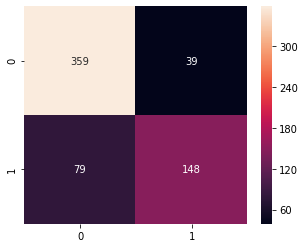

In [540]:
classifier = RandomForestClassifier()
prop_ret = 0.6

cutoff_num = int(round(len(covariate_num)*prop_ret,0))
cutoff_cat = int(round(len(covariate_cat)*(1-prop_ret),0))
print(cutoff_num, cutoff_cat)

cov_selected = covariate_cat[:cutoff_cat]+covariate_num[:cutoff_num]
print(cov_selected)

classifier.fit(X_final, y_final)
y_pred = classifier.predict(X_test)


print(classification_report(y_test, y_pred))
fig, ax = plt.subplots(figsize = (5,4))
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

plt.show()